In [ ]:
!pip install pygithub

     |████████████████████████████████| 291 kB 5.4 MB/s 
     |████████████████████████████████| 856 kB 45.0 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


i am using this pygithub to access github api and mainly for the pagination purpose

-: https://github.com/settings/tokens
-: generate new token
-: just for "public repo"
-: token:ghp.....


In [ ]:
from github import Github
ACCESS_TOKEN = open("/content/token.txt","r").read()
g=Github(ACCESS_TOKEN)
print(g.get_user())

AuthenticatedUser(login=None)


after authentication now i can query github

In [ ]:
# query = "language:python" 

we can make query like this too as made below

In [ ]:
query ="django language:python created:2021-03-01..2021-04-01"

In [ ]:
result = g.search_repositories(query)

here is result is paginatedList object of github 
<github.PaginatedList.PaginatedList at 0x7f5e7c50da10>

In [ ]:
print(result.totalCount)

1000


In [ ]:
print(dir(result))

['_PaginatedListBase__elements', '_PaginatedListBase__fetchToIndex', '_PaginatedList__contentClass', '_PaginatedList__firstParams', '_PaginatedList__firstUrl', '_PaginatedList__headers', '_PaginatedList__list_item', '_PaginatedList__nextParams', '_PaginatedList__nextUrl', '_PaginatedList__parseLinkHeader', '_PaginatedList__requester', '_PaginatedList__reverse', '_PaginatedList__totalCount', '_Slice', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_couldGrow', '_fetchNextPage', '_getLastPageUrl', '_grow', '_isBiggerThan', '_reversed', 'get_page', 'reversed', 'totalCount']


In [ ]:
for repository in result:
  print(dir(repository))
  break

['CHECK_AFTER_INIT_FLAG', '_CompletableGithubObject__complete', '_CompletableGithubObject__completed', '_GithubObject__makeSimpleAttribute', '_GithubObject__makeSimpleListAttribute', '_GithubObject__makeTransformedAttribute', '_Repository__create_pull', '_Repository__create_pull_1', '_Repository__create_pull_2', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_allow_merge_commit', '_allow_rebase_merge', '_allow_squash_merge', '_archive_url', '_archived', '_assignees_url', '_blobs_url', '_branches_url', '_clone_url', '_collaborators_url', '_comments_url', '_commits_url', '_compare_url', '_completeIfNeeded', '_completeIfNotSet', '_contents_url', '_contributors_url', '_created_at', '_default_branc

our url is basically present in repository.clone_url attribute

In [ ]:
for repository in result:
  print(f"{repository.clone_url}")
  print(dir(repository))
  break

https://github.com/SteinOveHelset/djackets_django.git
['CHECK_AFTER_INIT_FLAG', '_CompletableGithubObject__complete', '_CompletableGithubObject__completed', '_GithubObject__makeSimpleAttribute', '_GithubObject__makeSimpleListAttribute', '_GithubObject__makeTransformedAttribute', '_Repository__create_pull', '_Repository__create_pull_1', '_Repository__create_pull_2', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_allow_merge_commit', '_allow_rebase_merge', '_allow_squash_merge', '_archive_url', '_archived', '_assignees_url', '_blobs_url', '_branches_url', '_clone_url', '_collaborators_url', '_comments_url', '_commits_url', '_compare_url', '_completeIfNeeded', '_completeIfNotSet', '_contents_url

In [ ]:
import time 
import os
from datetime import datetime

end_time = time.time()
start_time = end_time - 86400

for i in range(3):
    try:  
        start_time_str = datetime.utcfromtimestamp(start_time).strftime('%Y-%m-%d')
        end_time_str = datetime.utcfromtimestamp(end_time).strftime('%Y-%m-%d')
        query = f"language:python created:{start_time_str}..{end_time_str}"
        print(query)
        end_time -= 86400
        start_time -= 86400

        result = g.search_repositories(query)
        print(result.totalCount)
        for repository in result:
            print(f"{repository.clone_url}")
            print(f"{repository.owner.login}")
            os.system(f"git clone {repository.clone_url} /content/repos/{repository.owner.login}/{repository.name}" )
            print(f"current start time {start_time}")
    except Exception as e:
        print(str(e))
        print("Broke for some reason...")
        time.sleep(120)
print("finished, your new end time should be", start_time)
# print(datetime.utcfromtimestamp(start_time).strftime('%Y-%m-%d'))
# print(datetime.utcfromtimestamp(end_time).strftime('%Y-%m-%d'))

language:python created:2022-05-01..2022-05-02
1000
https://github.com/n0vad3v/AutoRL.git
n0vad3v
current start time 1651296126.905725
https://github.com/vesperlol/Kiwee-Grabber.git
vesperlol
current start time 1651296126.905725
https://github.com/FadedCosine/kNN-KD.git
FadedCosine
current start time 1651296126.905725
https://github.com/LTH14/targeted-supcon.git
LTH14
current start time 1651296126.905725
https://github.com/aiko-tanaka/Grammar-Dictionaries.git
aiko-tanaka
current start time 1651296126.905725
https://github.com/Kannachann/Spam-CALL.git
Kannachann
current start time 1651296126.905725
https://github.com/Timothyxxx/LMsMBTI.git
Timothyxxx
current start time 1651296126.905725
https://github.com/CrazorTheCat/BSDS-V43.git
CrazorTheCat
current start time 1651296126.905725
https://github.com/csvwolf/i-love-study.git
csvwolf
current start time 1651296126.905725
https://github.com/marvinjoel/email-verification.git
marvinjoel
current start time 1651296126.905725
https://github.com/L

KeyboardInterrupt: ignored

In [ ]:
import os
import stat
import time 
from tqdm import tqdm

d = "/content/repos"
for dirpath, dirnames, filenames in tqdm(os.walk(d)):
    for f in filenames:
        full_path = os.path.join(dirpath,f)

        if full_path.endswith(".py"):
            # print(f"keeping {full_path}")
            pass
        else:
            # print(f"deleting {full_path}")
            if os.path.exists(full_path) and d in full_path :
                os.chmod(full_path,stat.S_IWRITE) #to delete read-only and binary files too.
                os.remove(full_path) 
            else:
                print("something is wrong buddy!")
                # os.remove(full_path)
                # time.sleep(0.5)  
        if len(os.listdir(dirpath)) == 0:  # if the directory gets empty then delete it too
            os.rmdir(dirpath)
    for path, _, _ in os.walk(dirpath):
      if len(os.listdir(path))==0 :
        os.rmdir(path)
               

       



    # time.sleep(0.5)     
    

5627it [00:02, 1910.28it/s]


In [ ]:
import os
import stat
import time 
from tqdm import tqdm

MAX_CHAR_LENGTH = 512
MIN_CHAR_LENGTH = 150
NEWLINE_CHAR = "<N>"

d = "/content/repos"
full_paths = []
for dirpath, dirnames, filenames in os.walk(d):
    for f in filenames:
        full_path = os.path.join(dirpath,f)
        full_paths.append(full_path)
print(len(full_paths))         # 1589


with open("/content/python_data.txt","a",encoding='utf-8') as file:
    for fpath in tqdm(full_paths):
        try:
            data  = open(fpath,"r",encoding='utf-8').read() 
            # to remove this (UnicodeDecodeError: 'charmap' codec) error we have use encoding='mbcs'
            fd = data.replace("\n",NEWLINE_CHAR)
            if 100 < len(data) <= MAX_CHAR_LENGTH:
                file.write(fd+"\n")
            else :
                sd = fd.split(f"{NEWLINE_CHAR}{NEWLINE_CHAR}")
                substring = ""
                for split in sd:
                    substring += split+f"{NEWLINE_CHAR}{NEWLINE_CHAR}"
                    if MIN_CHAR_LENGTH < len(substring) <= MAX_CHAR_LENGTH:
                        file.write(substring+"\n")
                        substring = ""  
        except Exception as e:
            print(str(e))                



29769


 17%|█▋        | 5161/29769 [00:00<00:03, 8162.85it/s]

'utf-8' codec can't decode byte 0xa4 in position 64: invalid start byte


 42%|████▏     | 12411/29769 [00:01<00:02, 7538.61it/s]

'utf-8' codec can't decode byte 0xb1 in position 81: invalid start byte


 54%|█████▍    | 16166/29769 [00:02<00:02, 5413.26it/s]

[Errno 2] No such file or directory: '/content/repos/lathanelapati/personal-details/venv/lib/python3.8/site-packages/zipp.py'
[Errno 2] No such file or directory: '/content/repos/lathanelapati/personal-details/venv/lib/python3.8/site-packages/typing_extensions.py'
[Errno 2] No such file or directory: '/content/repos/lathanelapati/personal-details/venv/lib/python3.8/site-packages/docopt.py'
[Errno 2] No such file or directory: '/content/repos/lathanelapati/personal-details/venv/lib/python3.8/site-packages/six.py'
[Errno 2] No such file or directory: '/content/repos/lathanelapati/personal-details/venv/lib/python3.8/site-packages/packaging/requirements.py'
[Errno 2] No such file or directory: '/content/repos/lathanelapati/personal-details/venv/lib/python3.8/site-packages/packaging/tags.py'
[Errno 2] No such file or directory: '/content/repos/lathanelapati/personal-details/venv/lib/python3.8/site-packages/packaging/_typing.py'
[Errno 2] No such file or directory: '/content/repos/lathanelap

 56%|█████▋    | 16772/29769 [00:02<00:03, 3908.39it/s]

[Errno 2] No such file or directory: '/content/repos/lathanelapati/personal-details/venv/lib/python3.8/site-packages/numpy/fft/__init__.py'
[Errno 2] No such file or directory: '/content/repos/lathanelapati/personal-details/venv/lib/python3.8/site-packages/numpy/fft/_pocketfft.py'
[Errno 2] No such file or directory: '/content/repos/lathanelapati/personal-details/venv/lib/python3.8/site-packages/numpy/fft/tests/__init__.py'
[Errno 2] No such file or directory: '/content/repos/lathanelapati/personal-details/venv/lib/python3.8/site-packages/numpy/fft/tests/test_helper.py'
[Errno 2] No such file or directory: '/content/repos/lathanelapati/personal-details/venv/lib/python3.8/site-packages/numpy/fft/tests/test_pocketfft.py'
[Errno 2] No such file or directory: '/content/repos/lathanelapati/personal-details/venv/lib/python3.8/site-packages/numpy/testing/setup.py'
[Errno 2] No such file or directory: '/content/repos/lathanelapati/personal-details/venv/lib/python3.8/site-packages/numpy/testing

 58%|█████▊    | 17261/29769 [00:02<00:04, 3011.96it/s]

[Errno 2] No such file or directory: '/content/repos/lathanelapati/personal-details/venv/lib/python3.8/site-packages/parso/python/parser.py'
[Errno 2] No such file or directory: '/content/repos/lathanelapati/personal-details/venv/lib/python3.8/site-packages/parso/python/tokenize.py'
[Errno 2] No such file or directory: '/content/repos/lathanelapati/personal-details/venv/lib/python3.8/site-packages/parso/python/token.py'
[Errno 2] No such file or directory: '/content/repos/lathanelapati/personal-details/venv/lib/python3.8/site-packages/parso/python/tree.py'
[Errno 2] No such file or directory: '/content/repos/lathanelapati/personal-details/venv/lib/python3.8/site-packages/parso/python/errors.py'
[Errno 2] No such file or directory: '/content/repos/lathanelapati/personal-details/venv/lib/python3.8/site-packages/pylev/recursive.py'
[Errno 2] No such file or directory: '/content/repos/lathanelapati/personal-details/venv/lib/python3.8/site-packages/pylev/__init__.py'
[Errno 2] No such file 

 59%|█████▉    | 17654/29769 [00:03<00:05, 2297.97it/s]

[Errno 2] No such file or directory: '/content/repos/lathanelapati/personal-details/venv/lib/python3.8/site-packages/pip/_internal/operations/build/metadata.py'
[Errno 2] No such file or directory: '/content/repos/lathanelapati/personal-details/venv/lib/python3.8/site-packages/pip/_internal/index/__init__.py'
[Errno 2] No such file or directory: '/content/repos/lathanelapati/personal-details/venv/lib/python3.8/site-packages/pip/_internal/index/sources.py'
[Errno 2] No such file or directory: '/content/repos/lathanelapati/personal-details/venv/lib/python3.8/site-packages/pip/_internal/index/collector.py'
[Errno 2] No such file or directory: '/content/repos/lathanelapati/personal-details/venv/lib/python3.8/site-packages/pip/_internal/index/package_finder.py'
[Errno 2] No such file or directory: '/content/repos/lathanelapati/personal-details/venv/lib/python3.8/site-packages/pip/_internal/metadata/base.py'
[Errno 2] No such file or directory: '/content/repos/lathanelapati/personal-details/

 62%|██████▏   | 18317/29769 [00:03<00:04, 2314.69it/s]

[Errno 2] No such file or directory: '/content/repos/lathanelapati/personal-details/venv/lib/python3.8/site-packages/setuptools/_distutils/text_file.py'
[Errno 2] No such file or directory: '/content/repos/lathanelapati/personal-details/venv/lib/python3.8/site-packages/setuptools/_distutils/archive_util.py'
[Errno 2] No such file or directory: '/content/repos/lathanelapati/personal-details/venv/lib/python3.8/site-packages/setuptools/_distutils/sysconfig.py'
[Errno 2] No such file or directory: '/content/repos/lathanelapati/personal-details/venv/lib/python3.8/site-packages/setuptools/_distutils/extension.py'
[Errno 2] No such file or directory: '/content/repos/lathanelapati/personal-details/venv/lib/python3.8/site-packages/setuptools/_distutils/cygwinccompiler.py'
[Errno 2] No such file or directory: '/content/repos/lathanelapati/personal-details/venv/lib/python3.8/site-packages/setuptools/_distutils/_collections.py'
[Errno 2] No such file or directory: '/content/repos/lathanelapati/per

 63%|██████▎   | 18607/29769 [00:03<00:04, 2395.12it/s]

[Errno 2] No such file or directory: '/content/repos/lathanelapati/personal-details/venv/lib/python3.8/site-packages/poetry/core/_vendor/jsonschema/benchmarks/__init__.py'
[Errno 2] No such file or directory: '/content/repos/lathanelapati/personal-details/venv/lib/python3.8/site-packages/poetry/core/_vendor/jsonschema/benchmarks/issue232.py'
[Errno 2] No such file or directory: '/content/repos/lathanelapati/personal-details/venv/lib/python3.8/site-packages/poetry/core/_vendor/jsonschema/benchmarks/json_schema_test_suite.py'
[Errno 2] No such file or directory: '/content/repos/lathanelapati/personal-details/venv/lib/python3.8/site-packages/poetry/core/_vendor/tomlkit/__init__.py'
[Errno 2] No such file or directory: '/content/repos/lathanelapati/personal-details/venv/lib/python3.8/site-packages/poetry/core/_vendor/tomlkit/_compat.py'
[Errno 2] No such file or directory: '/content/repos/lathanelapati/personal-details/venv/lib/python3.8/site-packages/poetry/core/_vendor/tomlkit/exceptions

 95%|█████████▍| 28214/29769 [00:05<00:00, 8267.95it/s]

[Errno 2] No such file or directory: '/content/repos/tonypark/poky/scripts/pybootchartgui/pybootchartgui/main.py'


100%|██████████| 29769/29769 [00:05<00:00, 5736.75it/s]

'utf-8' codec can't decode byte 0x82 in position 3254: invalid start byte


In [ ]:
! pip install transformers
! pip install tokenizers

     |████████████████████████████████| 4.0 MB 4.1 MB/s 
     |████████████████████████████████| 6.6 MB 34.1 MB/s 
     |████████████████████████████████| 596 kB 41.7 MB/s 
     |████████████████████████████████| 77 kB 6.3 MB/s 
     |████████████████████████████████| 895 kB 46.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from tokenizers import ByteLevelBPETokenizer
from transformers import GPT2Config, GPT2LMHeadModel,GPT2Tokenizer


# We choose to train a byte-level Byte-pair encoding tokenizer (the same as GPT-2), 
# with the same special tokens as RoBERTa. Let’s arbitrarily pick its size to be 52,000.

# We recommend training a byte-level BPE (rather than let’s say, a WordPiece tokenizer like BERT) 
# because it will start building its vocabulary from an alphabet of single bytes, so all 
# words will be decomposable into tokens (no more <unk> tokens!).
TRAIN_BASE = True
paths = ["/content/python_data.txt"]

if TRAIN_BASE:
    tokenizer = ByteLevelBPETokenizer()

    tokenizer.train(files=paths, vocab_size=52_000, min_frequency=2, special_tokens=[
        "<s>",
        "<pad>",
        "</s>",
        "<unk>",
        "<mask>",
    ])

    # Save files to disk
    tokenizer.save_model("/content/tokenizer")


#--------------------------------------------------------------#

# test your model
# from tokenizers.implementations import ByteLevelBPETokenizer
# from tokenizers.processors import BertProcessing

# tokenizer = ByteLevelBPETokenizer(
#     "tokenizer/vocab.json",
#     "tokenizer/merges.txt",
# )

inp = "print('Hello world!')"

# t = tokenizer.encode(inp)

# print(t.ids) # numbers...
# print(t.tokens) # corresponding subword

#-----------------------------------------------------#

#model that we are gonna use it with import

tokenizer = GPT2Tokenizer.from_pretrained('/content/tokenizer')
tokenizer.add_special_tokens({
    "eos_token": "</s>",
    "bos_token": "<s>",
    "unk_token": "<unk>",
    "pad_token": "<pad>",
    "mask_token": "<mask>"
})

t = tokenizer.encode(inp)
print(t) # [290, 460, 12934, 306, 18633]

print(tokenizer.decode(t)) # print('Hello world!')



[290, 460, 12934, 306, 18633]
print('Hello world!')


In [ ]:
import shutil
shutil.rmtree("/content/GPyT")

In [ ]:
! pip install datasets


     |████████████████████████████████| 325 kB 3.9 MB/s 
     |████████████████████████████████| 212 kB 33.6 MB/s 
     |████████████████████████████████| 136 kB 41.0 MB/s 
     |████████████████████████████████| 1.1 MB 49.6 MB/s 
     |████████████████████████████████| 127 kB 51.9 MB/s 
     |████████████████████████████████| 271 kB 45.9 MB/s 
     |████████████████████████████████| 144 kB 38.3 MB/s 
     |████████████████████████████████| 94 kB 2.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
from tokenizers import ByteLevelBPETokenizer
from transformers import GPT2Config, GPT2LMHeadModel,GPT2Tokenizer, DataCollatorForLanguageModeling
from datasets import load_dataset 
from transformers import Trainer, TrainingArguments
paths = ['/content/python_data.txt']
tokenizer = GPT2Tokenizer.from_pretrained('/content/tokenizer')
tokenizer.add_special_tokens({
    "eos_token": "</s>",
    "bos_token": "<s>",
    "unk_token": "<unk>",
    "pad_token": "<pad>",
    "mask_token": "<mask>"
})

config = GPT2Config(
    vocab_size = tokenizer.vocab_size,
    bos_token = tokenizer.bos_token_id,
    eos_token = tokenizer.eos_token_id
)

model = GPT2LMHeadModel(config)

data = load_dataset("text",data_files = paths)

def encode(lines):
    return tokenizer(lines['text'],add_special_tokens = True, truncation = True , max_length = 512)

data.set_transform(encode)

data = data['train']

data_collator = DataCollatorForLanguageModeling(tokenizer = tokenizer, mlm = True , mlm_probability = 0.15) 
# mlm stands for masked language model



training_args = TrainingArguments(
    output_dir ="/content/GPyT",
    overwrite_output_dir = True,
    num_train_epochs = 1,
    per_device_train_batch_size = 10,
    save_steps=200,
    save_total_limit=2,
    prediction_loss_only=True,
    remove_unused_columns = False
)

trainer = Trainer(
    model = model,
    args = training_args,
    data_collator = data_collator,
    train_dataset = data
)

trainer.train()

trainer.save_model("/content/GPyT")

Using custom data configuration default-165896ad62c2a6d3
Reusing dataset text (/root/.cache/huggingface/datasets/text/default-165896ad62c2a6d3/0.0.0/4b86d314f7236db91f0a0f5cda32d4375445e64c5eda2692655dd99c2dac68e8)


  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 13809
  Num Epochs = 1
  Instantaneous batch size per device = 10
  Total train batch size (w. parallel, distributed & accumulation) = 10
  Gradient Accumulation steps = 1
  Total optimization steps = 1381


Step,Training Loss
500,4.827800
1000,3.991100


Saving model checkpoint to /content/GPyT/checkpoint-200
Configuration saved in /content/GPyT/checkpoint-200/config.json
Model weights saved in /content/GPyT/checkpoint-200/pytorch_model.bin
Saving model checkpoint to /content/GPyT/checkpoint-400
Configuration saved in /content/GPyT/checkpoint-400/config.json
Model weights saved in /content/GPyT/checkpoint-400/pytorch_model.bin
Saving model checkpoint to /content/GPyT/checkpoint-600
Configuration saved in /content/GPyT/checkpoint-600/config.json
Model weights saved in /content/GPyT/checkpoint-600/pytorch_model.bin
Deleting older checkpoint [/content/GPyT/checkpoint-200] due to args.save_total_limit
Saving model checkpoint to /content/GPyT/checkpoint-800
Configuration saved in /content/GPyT/checkpoint-800/config.json
Model weights saved in /content/GPyT/checkpoint-800/pytorch_model.bin
Deleting older checkpoint [/content/GPyT/checkpoint-400] due to args.save_total_limit
Saving model checkpoint to /content/GPyT/checkpoint-1000
Configurati

In [ ]:
from tokenizers import ByteLevelBPETokenizer
from transformers import GPT2Config, GPT2LMHeadModel,GPT2Tokenizer, DataCollatorForLanguageModeling

paths = ['/content/python_data.txt']
tokenizer = GPT2Tokenizer.from_pretrained('tokenizer')
tokenizer.add_special_tokens({
    "eos_token": "</s>",
    "bos_token": "<s>",
    "unk_token": "<unk>",
    "pad_token": "<pad>",
    "mask_token": "<mask>"
})

config = GPT2Config(
    vocab_size = tokenizer.vocab_size,
    bos_token = tokenizer.bos_token_id,
    eos_token = tokenizer.eos_token_id
)

model = GPT2LMHeadModel.from_pretrained("/content/GPyT").to("cuda")


while True:
    inp = input(">>> ")
    # inp = inp.replace()
    input_ids = tokenizer.encode(inp, return_tensors ="pt").to("cuda")
    beam_output = model.generate(
        input_ids,
        max_length = 512,
        num_beams = 10, 
        temperature = 0.7,
        no_repeat_ngram_size = 5,
        num_returned_sequences = 1
    ) # these parameters basically helps to generate variety of tokens from the token reached or selected

    for beam in beam_output:
        out = tokenizer.decode(beam)
        fout = out.replace("<N>", "\n")

        print(str(fout))


In [15]:
from tokenizers import ByteLevelBPETokenizer
from transformers import GPT2Config, GPT2LMHeadModel,GPT2Tokenizer, DataCollatorForLanguageModeling

paths = ['python_data.txt']
tokenizer = GPT2Tokenizer.from_pretrained('tokenizer')
tokenizer.add_special_tokens({
    "eos_token": "</s>",
    "bos_token": "<s>",
    "unk_token": "<unk>",
    "pad_token": "<pad>",
    "mask_token": "<mask>"
})

config = GPT2Config(
    vocab_size = tokenizer.vocab_size,
    bos_token = tokenizer.bos_token_id,
    eos_token = tokenizer.eos_token_id
)

model = GPT2LMHeadModel.from_pretrained("/content/GPyT").to("cuda")

def encode_newlines(inp):
    return inp.replace("\n","<N>")

def decode_newlines(inp):
    return inp.replace("<N>","\n")



# while True:
inp = 'def __init__'
inp = inp.replace('\n','<N>')
input_ids = tokenizer.encode(inp, return_tensors ="pt").to("cuda")
beam_output = model.generate(
    input_ids,
    max_length = 100,
    num_beams = 5, 
    temperature = 0.7,
    no_repeat_ngram_size = 5,
    num_returned_sequences = 3,
    return_dict_in_generate = True,
    output_scores= True
) # these parameters basically helps to generate variety of tokens from the token reached or selected

# for beam in beam_output:
#     out = tokenizer.decode(beam)
#     fout = out.replace("<N>", "\n")

#     print(str(fout))

for beam in beam_output:
    print(beam)

for seqscore in beam_output['sequences_scores']:
    print(seqscore)    


for seq in beam_output['sequences']:
    print(decode_newlines(tokenizer.decode(seq)))    

    

Didn't find file tokenizer/added_tokens.json. We won't load it.
Didn't find file tokenizer/special_tokens_map.json. We won't load it.
Didn't find file tokenizer/tokenizer_config.json. We won't load it.
loading file tokenizer/vocab.json
loading file tokenizer/merges.txt
loading file None
loading file None
loading file None
Assigning </s> to the eos_token key of the tokenizer
Assigning <s> to the bos_token key of the tokenizer
Assigning <unk> to the unk_token key of the tokenizer
Assigning <pad> to the pad_token key of the tokenizer
Assigning <mask> to the mask_token key of the tokenizer
loading configuration file /content/GPyT/config.json
Model config GPT2Config {
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token": 0,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token": 2,
  "eos_token_id": 50256,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_embd": 768,
  "n_head": 12

sequences
sequences_scores
scores
beam_indices
tensor(-1.1396, device='cuda:0')
def __init__ = []

    def __init__(self):
        return None:

        # type: str:
        return self._vendor.append(self):


            return None:
        self.append(self) -> str:
            # type: str) -> None:
            return self._internal:
        if self._vendor
        self._internal


In [17]:
print(len(beam_output['scores']))

for mask_token in beam_output['scores']:
  print(len(mask_token)) #5 is the num of beams 
  for beam in mask_token:
    print(len(beam))  #vector of all vocab
  break

96
5
25534
25534
25534
25534
25534


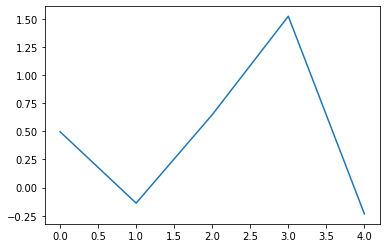

In [20]:
##script

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = range(5)
y = np.random.normal(size=len(x))

plt.plot(x,y)
plt.show()

In [37]:
def auto_complete(inp):
  inp = encode_newlines(inp)

  newline_count = inp.count('<N>')
  input_ids = tokenizer.encode(inp, return_tensors ="pt").to("cuda")
  beam_output = model.generate(
      input_ids,
      max_length = 100,
      num_beams = 5, 
      temperature = 0.7,
      no_repeat_ngram_size = 5,
      num_returned_sequences = 3,
      return_dict_in_generate = True,
      output_scores= True
  ) 

  sequence = beam_output['sequences'][0]
  decoded = decode_newlines(tokenizer.decode(sequence))
  print(20*"-")
  print(decoded)
  print(20*"-")
  print()

  auto_complete = ""
  split = decoded.split('\n')
  print(split)

  for s in split[:newline_count+1]:
    auto_complete += s + '\n'

  return auto_complete  

In [41]:
exp_inp = """import numpy"""
ac = auto_complete(exp_inp)
print("autocompleted")
print(ac)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


--------------------
import numpy
import os
import sys
import re
from pip._internal.utils.utils import get_from pip._vendor.utils.utils.core import get_from distutils.utils.utils


from typing import get_name

    def __init__(self):

        self._internal.utils import Optional
        self
        return None<N
--------------------

['import numpy', 'import os', 'import sys', 'import re', 'from pip._internal.utils.utils import get_from pip._vendor.utils.utils.core import get_from distutils.utils.utils', '', '', 'from typing import get_name', '', '    def __init__(self):', '', '        self._internal.utils import Optional', '        self', '        return None<N']
autocompleted
import numpy

